# DLCV Assignment 1

**Due Date: 22/02/2024 11:59PM IST**

**Name:** Rishav Saha

**Sr. No.:** 22573


In this assignment, we will cover the following topics:

1) Training a simple Linear Model 

2) Implementing Modules with Backprop functionality

3) Implementing Convolution Module on Numpy


It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like caffe,pytorch etc), which directly give functions for these steps, are to be used. 

# Training a simple Linear Model

In this section, you will write the code to train a Linear Model. The goal is to classify an input $X_i$ of size $n$ into one of $m$ classes. For this, you need to consider the following:

1)  **Weight Matrix** $W_{n\times m}$: The Weights are multipled with the input $X_i$ (vector of size $n$), to find $m$ scores $S_m$ for the $m$ classes.

2)  **The Loss function**:   
  * The Cross Entropy Loss: By interpreting the scores as unnormalized log probabilities for each class, this loss tries to measure dissatisfaction with the scores in terms of the log probability of the right class:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where $f_{ y_i }$ is the $y_i$-th element of the output of $W^T  X_i$

3) **A Regularization term**: In addition to the loss, you need a Regularization term to lead to a more distributed (in case of $L_2$) or sparse (in case of $L_1$) learning of the weights. For example, with $L_2$ regularization, the loss has the following additional term:

$$
R(W) = \sum_k\sum_l W_{k,l}^2  
$$

Thus the total loss has the form:
$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$

4) **An Optimization Procedure**: This refers to the process which tweaks the weight Matrix $W_{n\times m}$ to reduce the loss function $L$. In our case, this refers to Mini-batch Gradient Descent algorithm. We adjust the weights $W_{n\times m}$, based on the gradient of the loss $L$ w.r.t. $W_{n\times m}$. This leads to:
$$
W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W},
$$
where $\alpha$ is the learning rate. Additionally, with "mini-batch" gradient descent, instead of finding loss over the whole dataset, we use a small sample $B$ of the training data to make each learning step. Hence,
$$
W_{t+1} = W_{t} - \alpha \frac{\partial \sum_{i \in B}{L_{x_i}}}{\partial W},
$$
where $|B|$ is the batch size.

# Question 1

Train a **Single-Layer Classifier** for the MNIST dataset. 
* Use Softmax-Loss.
* Maintain a train-validation split of the original training set for finding the right value of $\lambda$ for the regularization, and to check for over-fitting.
* Finally, evaluate the classification performance on the test-set.


In [83]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.
import idx2numpy
from sklearn.model_selection import train_test_split

data=idx2numpy.convert_from_file('train-images.idx3-ubyte')
labels=idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_data=idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_label=idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

#normalizing the data
data=data/255.0
test_data=test_data/255.0

# maintain a train-val split
training_x,crossval_x,training_y,crossval_y=train_test_split(data, labels, test_size=0.3)

# Now, write a generator that yields (random) mini-batches of the input data
# Do not use same set of mini-batches for different epochs
    
def get_minibatch(training_x=training_x, training_y=training_y,batch_size_param=32):
    ## Read about Python generators if required.

    ## WRITE CODE HERE
    batch_size=batch_size_param
    num_samples = len(training_x)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    num_batches = num_samples // batch_size
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_indices = indices[start_idx:end_idx]
        mini_x = training_x[batch_indices]
        mini_y = training_y[batch_indices]
        yield mini_x, mini_y

In [141]:
LAMBDA=0.1
import numpy as np
class Single_layer_classifier():
    
    def __init__(self, input_size, output_size):
        
        ## WRITE CODE HERE
        
        # Give the instance a weight matrix, initialized randomly
        # One possible strategy for a good initialization is Normal (0, σ) where σ = 1e-3.
        mean=0
        std_dev=10**(-3)
        self.weight_matrix=np.random.normal(loc=mean,scale=std_dev,size=(input_size,output_size))
        self.biases = np.zeros(output_size)
        # print(self.weight_matrix)
        # Try experimenting with different values of σ.
        
        # Xavier init
        # std_dev_2=2/(input_size+output_size)
        # W=np.random.normal(loc=mean,scale=std_dev_2,size=(input_size,output_size))
        # print(W)
        
        
    # Define the forward function
    def forward(self, input_x):
        
        # get the scores
        ## WRITE CODE HERE
        self.input_x=input_x
        self.scores=np.dot(input_x,self.weight_matrix) + self.biases
        return self.scores
        # return scores
    
    # Similarly a backward function
    # we define 2 backward functions (as Loss = L_data + L_reg, grad(Loss) = grad(L1) + grad(L2))
    
    def backward_Ldata(self, grad_from_loss):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the loss w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        # grad_scores_wrt_weights = self.input_x.T
        # print(grad_scores_wrt_weights)
        # Compute the gradient of the loss with respect to the weights using the chain rule
        # print(self.input_x)
        grad_loss_wrt_weights = np.dot(self.input_x.T , grad_from_loss) / len(self.input_x)
        grad_bias=np.mean(grad_from_loss, axis=0)
        # Return the gradient of the loss with respect to the weights
        return grad_loss_wrt_weights,grad_bias
        # return np.dot(tmp * (np.identity(n) - np.transpose(tmp)), grad_from_loss)
        # return grad_matrix
        
    def backward_Lreg(self):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the regularization-term
        # w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        frobenius_norm=np.linalg.norm(self.weight_matrix,ord=None)
        l2_reg=frobenius_norm
        return l2_reg

In [142]:
# Implement the Softmax loss function
def softmax(scores):
    #softmax
    exp_scores=np.exp(scores)
    # print(scores)
    softmax_prob=exp_scores/np.sum(exp_scores)
    return softmax_prob
    
def loss_function(input_y,scores):

    # ## WRITE CODE HERE  
    total_samples = input_y.shape[0] # Number of samples
    softmax_prob=softmax(scores)
    loss= -np.mean(np.sum(input_y * np.log(softmax_prob), axis=1))
    return loss

    
def loss_backward(scores,y):
    # This part deals with the gradient of the loss w.r.t the output of network
    # for example, in case of softmax loss(-log(q_c)), this part gives grad(loss) w.r.t. q_c
    # pass this to backward_ldata
    
    ## WRITE CODE HERE    
    grad_from_loss=softmax(scores) - y
    # Return the gradient of the loss with respect to the scores
    return grad_from_loss
    

### Create utility functions for calculating training and validation accuracy

In [143]:
# WRITE CODE HERE

In [144]:
def one_hot_encoding(y_labels,num_classes):
    batch_size= len(y_labels)
    one_hot = np.zeros((batch_size, num_classes))
    one_hot[np.arange(batch_size), y_labels] = 1
    return one_hot

In [145]:
def accuracy(input_x,input_y,classifier,BATCH_SIZE):
    input_x_reshaped=np.reshape(input_x,(BATCH_SIZE,784))
    scores=softmax(classifier.forward(input_x_reshaped))
    predicted_class=np.argmax(scores,axis=1)
    # print(predicted_class)
    # predicted_class_one_hot_encoded=one_hot_encoded_labels(predicted_class,10)
    return np.mean(predicted_class==np.argmax(input_y,axis=1))

In [146]:
# minibatch=get_minibatch()

In [156]:
# Finally the trainer:
# Make an instance of Single_layer_classifier
# Train for t epochs:
###  Train on the train-set obtained from train-validation split
###  Use the mini-batch generator to get each mini-batch
EPOCHS=10
LEARNING_RATE=0.01
training_losses_nn=[]
train_accuracies_nn=[]
validation_accuracies_nn=[]

def training(EPOCH_SIZE,BATCH_SIZE,x_train,y_train):
    classifier=Single_layer_classifier(784,10)
    for epoch in range(EPOCHS):
        minibatch=get_minibatch(training_x=x_train,training_y=y_train,batch_size_param=BATCH_SIZE)
        for iter_num,(input_x , input_y) in enumerate(minibatch):
            # Write code for each iteration of the training
            # print(iter_num)
            # print(input_x[0])
            # break
            one_hot_encoded_labels=one_hot_encoding(input_y,10)
            input_x_reshaped=np.reshape(input_x,(BATCH_SIZE,28*28))
            
            # Forward pass
            scores=classifier.forward(input_x_reshaped) # 100 *10
            # print(scores)
    
            #loss
            loss=loss_function(one_hot_encoded_labels,scores)
            lreg=classifier.backward_Lreg()
            # print(f"reg shape: {lreg.shape}")
            # print(f"loss shape: {loss.shape}")
            # print(loss)
            training_losses_nn.append(loss+(LAMBDA*lreg))
        
            # Backward pass
            output_gradient=loss_backward(scores,one_hot_encoded_labels)
            final_grad_out,gradient_bias=classifier.backward_Ldata(output_gradient)
            # Update weights
            classifier.weight_matrix-=LEARNING_RATE*(final_grad_out)
            classifier.biases-=LEARNING_RATE*gradient_bias
            # Log the training loss value and training accuracy 
            if iter_num % 100 == 0:
                train_accuracy = accuracy(input_x, one_hot_encoded_labels, classifier,BATCH_SIZE)
                train_accuracies_nn.append(train_accuracy)
    return classifier

In [157]:
import warnings
warnings.filterwarnings("ignore")

first_train_classifier=training(15,128,x_train=training_x,y_train=training_y)

In [158]:
# training_losses_nn

### Plot the training loss and training accuracy plot

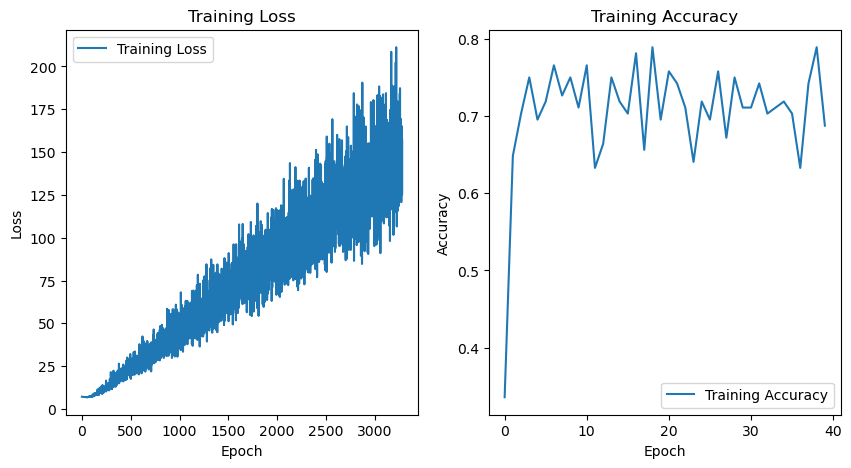

In [159]:
# WRITE CODE HERE
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_losses_nn, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_nn, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

### Find the accuracy on the validation set

In [165]:
def validation(classifier, validation_x, validation_y,BATCH_SIZE):
    validation_accuracies = []
    validation_minibatch=get_minibatch(training_x=validation_x,training_y=validation_y,batch_size_param=BATCH_SIZE)
    for input_x, input_y in validation_minibatch:
        one_hot_encoded_labels = one_hot_encoding(input_y, 10)
        input_x_reshaped = np.reshape(input_x, (BATCH_SIZE, 28 * 28))
        
        # Forward pass
        scores = classifier.forward(input_x_reshaped)
        
        # Calculate accuracy
        validation_accuracy = accuracy(input_x, one_hot_encoded_labels, classifier,BATCH_SIZE=BATCH_SIZE)
        validation_accuracies.append(validation_accuracy)
    
    # Calculate average accuracy
    mean_validation_accuracy = np.mean(validation_accuracies)
    # plt.plot(validation_accuracies,label="Validation Accuracy")
    
    return mean_validation_accuracy
val_acc=validation(first_train_classifier,crossval_x,crossval_y,32)
print(f"Accuracy on Validation Set : {round(val_acc,2)*100}%")

Accuracy on Validation Set : 71.0%


In [167]:
# The next step is to find the optimal value for lambda, number of epochs, learning rate and batch size. 
# CHOSE ANY TWO from the above mentioned to tune.
# Create plot and table to show the effect of the hparams.

# performing grid search to find the optimal batch size and epoch size
batch_size_candidates=[8,16,32,64,128,256]
epoch_size_candidates=[10,20,30,40,50,60]

highest_accuracy=0
best_epoch_size=None
best_batch_size=None

for batch in batch_size_candidates:
    for epoch in epoch_size_candidates:
        trained_classifier=training(EPOCH_SIZE=epoch,BATCH_SIZE=batch,x_train=training_x,y_train=training_y)
        validation_mean_accuracy=validation(trained_classifier,crossval_x,crossval_y,batch)

        if validation_mean_accuracy>highest_accuracy:
            highest_accuracy=validation_mean_accuracy
            best_epoch_size=epoch
            best_batch_size=batch

print(best_epoch_size)
print(best_batch_size)

10
64


### Report final performance on MNIST test set

In [168]:
# WRITE CODE HERE
#training using the best parameters

best_train_classifier=training(BATCH_SIZE=best_batch_size,EPOCH_SIZE=best_epoch_size,x_train=training_x,y_train=training_y)

In [169]:
test_label_one_hot_encoded=one_hot_encoding(test_label[0:best_batch_size],10)
test_accuracy=accuracy(test_data[0:best_batch_size],test_label_one_hot_encoded,best_train_classifier,best_batch_size)*100
print(f"Test Accuracy : {test_accuracy} % ")

Test Accuracy : 73.4375 % 


### Find the best performing class and the worst performing class

In [170]:
# WRITE CODE HERE
class_performance={}
def performance_check(input_x,input_y,classifier):
    input_x_reshaped = np.reshape(input_x, (len(input_x), 784))
    scores = softmax(classifier.forward(input_x_reshaped))
    predicted_class = np.argmax(scores, axis=1)
    for i in range(len(input_x)):
        if input_y[i] != predicted_class[i]:
            if input_y[i] not in class_performance:
                class_performance[input_y[i]] = 1
            else:
                class_performance[input_y[i]] += 1

performance_check(test_data,test_label,best_train_classifier)
# print(class_performance)

Keymin = min(zip(class_performance.values(), class_performance.keys()))[1]
print(f"Best Performing Class : {Keymin}")

Best Performing Class : 0


# Training a Linear Classifier on MNIST from scikit-learn

In this section you have to train a linear classifier from the scikit-learn library and compare its results against your implementation.
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [171]:
    # WRITE CODE HERE 
    # WRITE CODE HERE 
from sklearn.linear_model import LogisticRegression
X_train=training_x
Y_train=training_y
x_test=test_data
y_test=test_label
regression_model=LogisticRegression()
X_train_reshaped=np.reshape(X_train,(42000,28*28))
x_test_reshaped=np.reshape(x_test,(10000,28*28))
# print(X_train_reshaped.shape)
# print(Y_train.shape)
# print(x_test.shape)
regression_model.fit(X_train_reshaped,Y_train)
y_pred=regression_model.predict(x_test_reshaped)

In [172]:
len(y_pred)

10000

In [173]:
len(y_test)

10000

In [174]:
def sklearn_accuracy(y_pred,y_actual):
    num_samples=len(y_pred)
    correct_prediction=0
    for i in range(num_samples):
        if y_pred[i]==y_actual[i]:
            correct_prediction+=1
    return (correct_prediction/num_samples)*100

### Compare the training and test accuracies for the your implementation and linear classifier from scikit-learn

In [175]:
    # WRITE CODE HERE
scikit_accuracy=sklearn_accuracy(y_pred,y_test)
print(f"Accuracy using scikit learn linear classifier : {scikit_accuracy}%")
print(f"Accuracy using our neural network : {test_accuracy}%")

Accuracy using scikit learn linear classifier : 92.4%
Accuracy using our neural network : 73.4375%


### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [176]:
# WRITE CODE HERE
training_data_size=[0.1,0.2,0.5]
test_accuracy=[]
for size in training_data_size:
    new_training_x,new_test_x,new_training_y,new_test_y=train_test_split(data, labels, test_size=1-size)
    model=training(EPOCH_SIZE=best_epoch_size,BATCH_SIZE=best_batch_size,x_train=new_training_x,y_train=new_training_y)
    new_test_label_one_hot_encoded=one_hot_encoding(new_test_y[0:best_batch_size],10)
    new_test_accuracy=accuracy(new_test_x[0:best_batch_size],new_test_label_one_hot_encoded,model,best_batch_size)*100
    test_accuracy.append(new_test_accuracy)

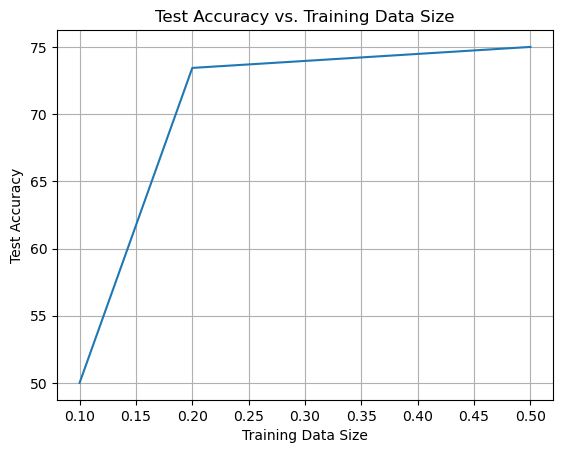

In [181]:
plt.plot(training_data_size,test_accuracy)
plt.title('Test Accuracy vs. Training Data Size')
plt.xlabel('Training Data Size')
plt.ylabel('Test Accuracy')
plt.grid(True)

# Implementing Backpropagation

Now that you have had some experience with single layer networks, we can proceed to more complex architectures. But first we need to completely understand and implement backpropagation.

## Backpropagation:

Simply put, a way of computing gradients of expressions through repeated application of chain rule. If
$$
L = f (g (h (\textbf{x})))
$$
then, by the chain rule we have:
$$
\frac{\partial L}{\partial \textbf{x}} = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial \textbf{x}} 
$$

** Look into the class Lecture for more detail **



# Question 2 : Scalar Backpropagation

Evaluate the gradient of the following function w.r.t. the input:

$$ f(x,y,z) =  log(\sigma(\frac{cos(\pi \times x)+sin(\pi \times y/2)}{tanh(z^2)}))$$
where $\sigma$ is the sigmoid function. Find gradient for the following inputs:
  * $(x,y,z)$ =  (2,4,1)
  * $(x,y,z)$ =  (9,14,3)
  * $(x,y,z)$ =  (128,42,666)
  * $(x,y,z)$ =  (52,14,28)

      

In [49]:
# To solve this problem, construct the computational graph
# Write a class with forward and backward functions, for each node if you like
# For eg:
class Cos():
    def __init__(self):
        pass
    def forward(self,x):
        self.x=x
        self.output=np.cos(np.pi*x)
        return self.output
    def backward(self,gradient_value):
        self.gradient=gradient_value*(-1 * np.sin(self.x))
        return self.gradient
    
class Sin():
    # def __init__(
    def forward(self,y):
        self.y=y
        self.output=np.sin(np.pi * (y/2))
        return self.output
    def backward(self,gradient_value):
        self.gradient=gradient_value*np.cos(self.y)
        return self.gradient
    
class Tanh():
    def forward(self,z):
        self.z=z
        self.output=np.tanh(z**2)
        return self.output
    def backward(self,gradient_value):
        self.gradient=gradient_value*(1-np.tanh(self.z)**2)
        return self.gradient
        

class Sigmoid():
    def __init__(self):
        pass
    def forward(self,cos_param,sin_param,tanh_param):
        self.cos_param=cos_param
        self.sin_param=sin_param
        self.tanh_param=tanh_param
        self.output=(self.cos_param+self.sin_param)/self.tanh_param
        # save values useful for backpropagation
        return self.output
    
    def backward(self,gradient_value):
        self.gradient=gradient_value*(self.output*(1-self.output))
        return self.gradient

class Log():
    def forward(self,sigmoid_parameter):
        self.sigmoid_parameter=sigmoid_parameter
        self.output=np.log(sigmoid_parameter)
        return self.output
    def backward(self,gradient_value):
        self.gradient=gradient_value/self.sigmoid_parameter
        return self.gradient
        
# CAUTION: Carefully treat the input and output dimension variation. At worst, handle them with if statements.

In [52]:
# Now write the class func
# which constructs the graph (all operators), forward and backward functions.

class Func():
    def __init__(self):
        # construct the graph here
        # assign the instances of function modules to self.var
        self.cos=Cos()
        self.sin=Sin()
        self.tanh=Tanh()
        self.log=Log()
        self.sigmoid=Sigmoid()
    def forward(self,x,y,z):
        # Using the graph element's forward functions, get the output. 
        self.cos_param=self.cos.forward(x)
        self.sin_param=self.sin.forward(y)
        self.tanh_param=self.tanh.forward(z)
        self.sigmoid_param=self.sigmoid.forward(self.cos_param,self.sin_param,self.tanh_param)
        self.log_param=self.log.forward(self.sigmoid_param)
        self.output=self.log_param
        return self.output
    
    def backward(self):
        # Use the saved outputs of each module, and backward() function calls
        # gradient_of_log=1
        # return [grad_x,grad_y,grad_z]
        grad_log = 1  # Gradient of the loss w.r.t. the output of the log
        grad_log_back = self.log.backward(grad_log)

        grad_sigma = self.sigmoid.backward(grad_log_back)

        grad_cos = self.cos.backward(grad_sigma)
        grad_sin = self.sin.backward(grad_sigma)
        grad_tanh = self.tanh.backward(grad_sigma)


        return grad_cos, grad_sin, grad_tanh

In [55]:
parameter_values=[[2,4,1],[9,14,3],[128,42,666],[52,14,8]]
for value in parameter_values:
    func=Func()
    forward_val=func.forward(value[0],value[1],value[2])
    grad_x, grad_y,grad_z=func.backward()
    print(f" For x: {value[0]} , y: {value[1]} , z: {value[2]}")
    print(f" Grad x :{grad_x} , Grad_y :{grad_y} , Grad_z:{grad_z}")

 For x: 2 , y: 4 , z: 1
 Grad x :0.2846421796101843 , Grad_y :0.20461351747185724 , Grad_z:-0.13146678792954025
 For x: 9 , y: 14 , z: 3
 Grad x :-0.8242369830366254 , Grad_y :0.27347444058067727 , Grad_z:0.01973207463139951
 For x: 128 , y: 42 , z: 666
 Grad x :-7.204614010398276e-16 , Grad_y :-3.996656155908121e-16 , Grad_z:0.0
 For x: 52 , y: 14 , z: 8
 Grad x :8.763013355310581e-16 , Grad_y :-1.2144704638202484e-16 , Grad_z:-3.998051646950293e-22


/tmp/ipykernel_372246/2437296272.py:53: RuntimeWarning: invalid value encountered in log
  self.output=np.log(sigmoid_parameter)


## Question 3 : Modular Vector Backpropagation

* Construct a Linear Layer module, implementing the forward and backward functions for arbitrary sizes.
* Construct a ReLU module, implementing the forward and backward functions for arbitrary sizes.
* Create a 2 layer MLP using the constructed modules.

* Modifying the functions built in Question 1 , train this two layer MLP for the same data set, MNIST, with the same train-val split.

In [183]:
# Class for Linear Layer (If you're stuck, you can refer to code of PyTorch/Tensorflow packages) 
import numpy as np

class LinearLayer:
    def __init__(self,input_layer_size,output_layer_size):
        mean=0
        std_dev=10**(-3)
        self.weight_matrix=np.random.normal(loc=mean,scale=std_dev,size=(input_layer_size,output_layer_size)) 
        # 784 x 128 for layer 1
        # 128 x 10 for layer 2
        # print(self.weight_matrix)
    def forward(self,input_data):
        self.input_data=input_data
        # 100 x 784 for layer 1
        # 100 x 128 for layer 2
        self.score=np.dot(input_data,self.weight_matrix) 
        # 100 x 128 score shape for layer 1
        # 100 x 10 score shape for layer 2
        return self.score
    def backward(self,gradient_output):
        self.gradient_wrt_weights=np.dot(self.input_data.T,gradient_output)
        # 128 x 10 for layer 2
        return np.dot(gradient_output,self.weight_matrix.T)

In [184]:
# class for ReLU
class ReLU:
    def forward(self,input_data):
        self.input_data=input_data
        self.out_data=np.maximum(0,input_data)
        # print(self.out_data.shape) # 100 x 128
        return self.out_data 
    def backward(self,out_grad):
        # print(out_grad.shape)
        # out_grad : 128 x 10
        return out_grad*(self.input_data>0)

In [185]:
# class for MLP
class MLP:
    def __init__(self,input_layer_size,hidden_layer_size,output_layer_size):
        self.linear_layer1=LinearLayer(input_layer_size,hidden_layer_size) # 784 x 128
        self.relu=ReLU()
        self.linear_layer_2=LinearLayer(hidden_layer_size,output_layer_size) # 128 x 10
    def forward(self,input_X):
        layer1_output=self.linear_layer1.forward(input_X)
        # print(layer1_output)
        relu_layer_output=self.relu.forward(layer1_output)
        layer2_output=self.linear_layer_2.forward(relu_layer_output)
        return layer2_output
    def backward(self,gradient_output):
        gradient_output1=self.linear_layer_2.backward(gradient_output)
        gradient_output2=self.relu.backward(gradient_output1)
        gradient_output3=self.linear_layer1.backward(gradient_output2)
        return gradient_output3

In [186]:
# performing one hot encoding
def one_hot_encoding(y_labels,num_classes):
    batch_size= len(y_labels)
    one_hot = np.zeros((batch_size, num_classes))
    one_hot[np.arange(batch_size), y_labels] = 1
    return one_hot
    
def softmax1(scores):
    #softmax
    exp_scores=np.exp(scores)
    # print(scores)
    softmax_prob=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    return softmax_prob
    
def cross_entropy_loss(input_y,scores):

    # num_of_datapoints = input_y.shape[0] # Number of samples
    # softmax_prob=softmax1(scores)
    # log_likelihood = -np.log(softmax_prob[range(num_of_datapoints), input_y.argmax(axis=1)])
    # loss = np.sum(log_likelihood) / num_of_datapoints
    # return loss
    total_samples = input_y.shape[0] # Number of samples
    softmax_prob=softmax(scores)
    loss= -np.mean(np.sum(input_y * np.log(softmax_prob), axis=1))
    return loss

In [187]:
#load the data and use the  mini batch of question 1

# minibatch_new=get_minibatch()

In [238]:
training_losses=[]
training_accuracy=[]
def linear_trainer(x_train,y_train,LEARNING_RATE=0.01,BATCH_SIZE=100):
    # LEARNING_RATE=0.001
    epochs=10
    mlp=MLP(input_layer_size=784,hidden_layer_size=128,output_layer_size=10)
    for epoch in range(epochs):
        epoch_loss=0
        correct=0
        total=0
        miniBatch=get_minibatch(batch_size_param=BATCH_SIZE,training_x=x_train,training_y=y_train)
        for index,(input_x,input_y) in enumerate(miniBatch):
            input_x_reshaped=np.reshape(input_x,(BATCH_SIZE,28*28))
            # print(input_x_reshaped.shape) # 100 x 784
            # break
            predicted_data=mlp.forward(input_x_reshaped) # 100 x 10
            #loss
            input_y_one_hot_encoded=one_hot_encoding(input_y,num_classes=10) # 100 x 10
            loss=cross_entropy_loss(input_y_one_hot_encoded,predicted_data)
            epoch_loss+=loss
            mlp.backward(predicted_data - input_y_one_hot_encoded) # passing a 100 x 10 tensor
        
            mlp.linear_layer1.weight_matrix -= LEARNING_RATE*mlp.linear_layer1.gradient_wrt_weights
            mlp.linear_layer_2.weight_matrix -= LEARNING_RATE*mlp.linear_layer_2.gradient_wrt_weights
            
            if index % BATCH_SIZE == 0:
                epoch_loss /= BATCH_SIZE
                train_accuracy = accuracy(input_x, input_y_one_hot_encoded, mlp,BATCH_SIZE)
                training_losses.append(epoch_loss)
                # epoch_loss=0
                training_accuracy.append(train_accuracy*100)
        return mlp

In [239]:
linear_classifier=linear_trainer(x_train=training_x,y_train=training_y)
print(f"{np.mean(train_accuracy)*100}%")

96.0%


### Plot the training loss and training accuracy plot

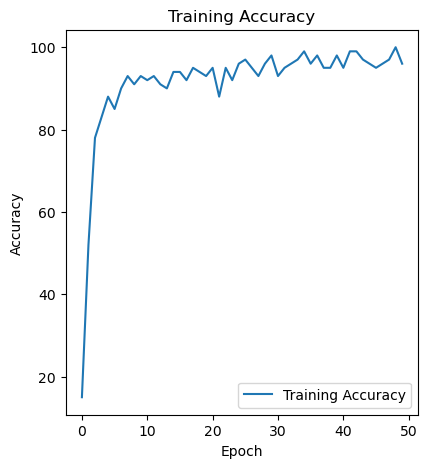

In [214]:
# Use the same utility functions defined in the previous question
# WRITE CODE HERE
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

### Find the accuracy on the validation set

In [240]:
# WRITE CODE HERE
def linear_classifier_validation(classifier, validation_x, validation_y,BATCH_SIZE):
    validation_accuracies = []
    validation_minibatch=get_minibatch(training_x=validation_x,training_y=validation_y,batch_size_param=BATCH_SIZE)
    for input_x, input_y in validation_minibatch:
        one_hot_encoded_labels = one_hot_encoding(input_y, 10)
        input_x_reshaped = np.reshape(input_x, (BATCH_SIZE, 28 * 28))
        
        # Forward pass
        scores = classifier.forward(input_x_reshaped)
        
        # Calculate accuracy
        validation_accuracy = accuracy(input_x, one_hot_encoded_labels, classifier,BATCH_SIZE=BATCH_SIZE)
        validation_accuracies.append(validation_accuracy)
    
    # Calculate average accuracy
    mean_validation_accuracy = np.mean(validation_accuracies)
    # plt.plot(validation_accuracies,label="Validation Accuracy")
    
    return mean_validation_accuracy
val_acc=linear_classifier_validation(linear_classifier,crossval_x,crossval_y,32)
print(f"Accuracy on Validation Set : {round(val_acc,2)*100}%")

Accuracy on Validation Set : 89.0%


In [231]:
# Find the optimal value of learning rate and batch size. 
# Use the same tuning strategy as the previous question
# Create plot and table to show the effect of the hparams.

def hyper_param_tuner():
    best_batch_size=None
    best_learning_rate=None
    batch_size_candidates=[8,16,32,64,128,256]
    # epoch_size_candidates=[10,20,30,40,50,60]
    learning_rate_parameter=[0.1,0.3,0.01,0.03,0.001,0.003]
    
    highest_accuracy=0

    
    for batch in batch_size_candidates:
        for rate in learning_rate_parameter:
            trained_classifier=linear_trainer(BATCH_SIZE=batch,LEARNING_RATE=rate,x_train=training_x,y_train=training_y)
            validation_mean_accuracy=linear_classifier_validation(trained_classifier,crossval_x,crossval_y,batch)
    
            if validation_mean_accuracy>highest_accuracy:
                highest_accuracy=validation_mean_accuracy
                best_batch_size=batch
                best_learning_rate=rate
    
    print(best_batch_size)
    print(best_learning_rate)
    return best_batch_size,best_learning_rate
best_batch_size,best_learning_rate=hyper_param_tuner()

16
0.03


### Report final performance on MNIST test set

In [241]:
# WRITE CODE HERE
# print(best_batch_size)
best_linear_classifier=linear_trainer(LEARNING_RATE=best_learning_rate,BATCH_SIZE=best_batch_size,x_train=training_x,y_train=training_y)
test_label_one_hot_encoded=one_hot_encoding(test_label[0:best_batch_size],10)
linear_test_accuracy=accuracy(test_data[0:best_batch_size],test_label_one_hot_encoded,best_train_classifier,best_batch_size)*100
print(f"Test Accuracy : {linear_test_accuracy} % ")

Test Accuracy : 75.0 % 


### Find the best performing class and the worst performing class

In [236]:
# WRITE CODE HERE
# WRITE CODE HERE
linear_class_performance={}
def linear_performance_check(input_x,input_y,classifier):
    input_x_reshaped = np.reshape(input_x, (len(input_x), 784))
    scores = softmax(classifier.forward(input_x_reshaped))
    predicted_class = np.argmax(scores, axis=1)
    for i in range(len(input_x)):
        if input_y[i] != predicted_class[i]:
            if input_y[i] not in class_performance:
                class_performance[input_y[i]] = 1
            else:
                class_performance[input_y[i]] += 1

linear_performance_check(test_data,test_label,best_linear_classifier)
# print(class_performance)

class_with_min_error = min(zip(class_performance.values(), class_performance.keys()))[1]
print(f"Best Performing Class : {class_with_min_error}")

Best Performing Class : 0


### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [244]:
# WRITE CODE HERE
linear_training_data_size=[0.1,0.2,0.5]
linear_test_accuracy=[]
for size in training_data_size:
    new_training_x,new_test_x,new_training_y,new_test_y=train_test_split(data, labels, test_size=1-size)
    model=linear_trainer(LEARNING_RATE=best_learning_rate,BATCH_SIZE=best_batch_size,x_train=new_training_x,y_train=new_training_y)
    new_test_label_one_hot_encoded=one_hot_encoding(new_test_y[0:best_batch_size],10)
    new_test_accuracy=accuracy(new_test_x[0:best_batch_size],new_test_label_one_hot_encoded,model,best_batch_size)*100
    test_accuracy.append(new_test_accuracy)

In [1]:
plt.plot(training_data_size,test_accuracy)
plt.title('Test Accuracy vs. Training Data Size')
plt.xlabel('Training Data Size')
plt.ylabel('Test Accuracy')
plt.grid(True)

NameError: name 'plt' is not defined


# Implementing a Convolution Module with Numpy

* This topic will require you to implement the Convolution operation using Numpy.
* We will use the Module for tasks like Blurring.
* Finally, we implement Backpropagation for the convolution module.


## Question 4

* Implement a naive Convolution module, with basic functionalities: kernel_size, padding, stride and dilation
  
* Test out the convolution layer by using it to do gaussian blurring on 10 random images of CIFAR-10 dataset


In [205]:
## Define a class Convolution Layer, which is initialized with the various required params:
class Convolution_Layer():
    
    def __init__(self,filter_size=3, bias=True, stride=1, padding=0, dilation=1):
        
        self.filter_size = filter_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.bias = bias
        self.input_channel=3
        
        # For an untrained layer, set random initial filter weights
        self.weights = np.random.randn(self.input_channel, filter_size,filter_size)
        
    def forward(self,input_image):
        
        # input_image=input_image.reshape((10000,self.input_channel,32,32))
        self.batch_size, self.input_channels, self.input_image_height, self.input_image_width = input_image.shape
        self.out_channels = self.weights.shape[0]
        
        # Calculate output dimensions

        self.output_image_height=int(np.floor(self.input_image_height-self.filter_size+ (2*self.padding))+1)
        self.output_image_width=int(np.floor(self.input_image_width-self.filter_size+ (2*self.padding))+1)
        # print(out_height)
        # print(out_width)
        # Padding input image
        padded_image = np.pad(input_image, ((0,0), (0,0), (self.padding,self.padding), (self.padding,self.padding)), mode='constant')
        # Initialize output
        output_image = np.zeros((self.batch_size, self.out_channels, self.output_image_height, self.output_image_width))
        
        # Convolution
        for batch in range(self.batch_size):
            for channel in range(self.out_channels):
                for height in range(self.output_image_height):
                    for width in range(self.output_image_width):
                        starting_height=height*self.stride
                        ending_height=starting_height+self.filter_size
                        starting_width=width*self.stride
                        ending_width=starting_width+self.filter_size

                        region_of_interest=padded_image[batch , : , starting_height:ending_height , starting_width:ending_width]
                        # output_image[batch, channel, height, width]=np.dot(region_of_interest.flatten(), self.weights[channel].flatten())
                        output_image[batch, channel, height, width] = np.sum(region_of_interest * self.weights[channel])
        # Output will be of the size (Batch_size, out_channels, out_height, out_width)
        return output_image
    
    def backward(self, grad_of_output_size):
        
        grad_weights=grad_of_output_size
        return grad_weights
    
    def set_weights(self, new_weights):
        ## Replace the set of weights with the given 'new_weights'
        ## use this for setting weights for blurring, bilateral filtering etc. 
        self.weights = new_weights

### Download CIFAR-10 images and load it in a numpy array (https://www.cs.toronto.edu/~kriz/cifar.html)



In [206]:
# WRITE CODE HERE
import pickle
def load_CIFAR():
    # file_path='cifar-10-batches-py\data_batch_1'
    file_path="data_batch_1"
    with open(file_path,'rb') as file:
        data=pickle.load(file,encoding='bytes')
    # for key in data.keys():
        # print(key)
    image_data=data[b'data']
    return image_data
input_data=load_CIFAR()

### Initialize a conv layer. Set weights for gaussian blurring (do not train the filter for this part). Visualise the filters using matplotlib


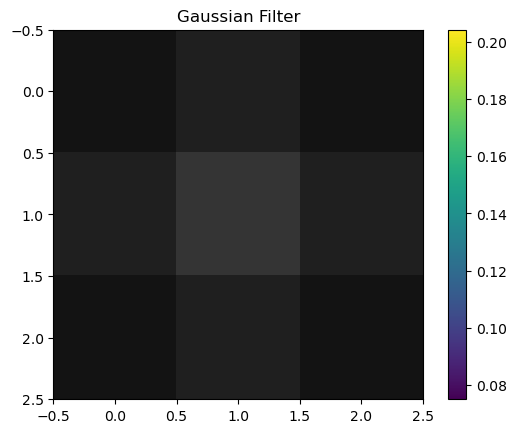

In [207]:
# WRITE CODE HERE
import numpy as np
from matplotlib import pyplot as plt

filter_size = 3
sigma = 1.0
depth = 3  # Depth for RGB channels
x = np.arange(-filter_size // 2 + 1, filter_size // 2 + 1)
gaussian_blur_filter = np.exp(-x**2 / (2 * sigma**2))
gaussian_blur_filter = gaussian_blur_filter / np.sum(gaussian_blur_filter)
gaussian_blur_filter = np.outer(gaussian_blur_filter, gaussian_blur_filter)
gaussian_blur_filter = np.stack([gaussian_blur_filter] * depth, axis=-1)  

# sol=Convolution_Layer(filter_size=3)
conv_layer = Convolution_Layer(filter_size=3)
conv_layer.set_weights(np.array([gaussian_blur_filter]))
plt.imshow(gaussian_blur_filter)
plt.title('Gaussian Filter')
plt.colorbar()
plt.show()

### Generate output for the first 5 images of the training set

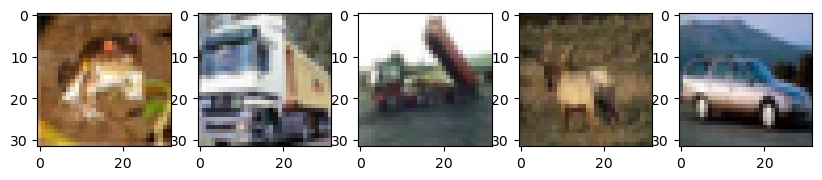

In [208]:
# WRITE CODE HERE
from matplotlib import pyplot as plt


plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.imshow(input_data[0].reshape(3,32,32).transpose(1,2,0))

plt.subplot(1,5,2)
plt.imshow(input_data[1].reshape(3,32,32).transpose(1,2,0))

plt.subplot(1,5,3)
plt.imshow(input_data[2].reshape(3,32,32).transpose(1,2,0))

plt.subplot(1,5,4)
plt.imshow(input_data[3].reshape(3,32,32).transpose(1,2,0))

plt.subplot(1,5,5)
plt.imshow(input_data[4].reshape(3,32,32).transpose(1,2,0))

plt.show()

### Use matplotlib to show the input and corresponding blurred output

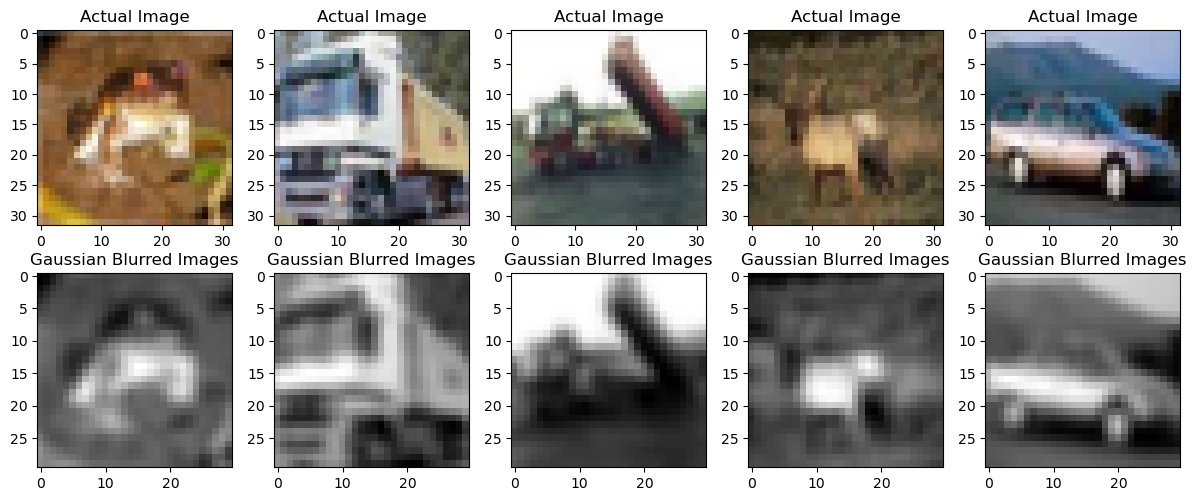

In [209]:
# WRITE CODE HERE
import matplotlib.pyplot as plt
import cv2
num_of_training_images=5
sample_images=input_data[:5]
blurred_images=conv_layer.forward(sample_images.reshape(5,3,32,32))

plt.figure(figsize=(12,5))
for i in range(num_of_training_images):
    blurred_image=conv_layer.forward(input_data[i].reshape(1,3,32,32))

    plt.subplot(2,num_of_training_images,i+1)
    plt.imshow(input_data[i].reshape(3,32,32).transpose(1,2,0))
    plt.title("Actual Image")

    plt.subplot(2,num_of_training_images,num_of_training_images+i+1)
    plt.imshow(blurred_image[0].transpose(1,2,0),cmap="gray")
    plt.title("Gaussian Blurred Images")

plt.tight_layout()
plt.show()

## Question 5
<br>
Now we will use this module for training a simple Convolution Layer using CIFAR-10 images. 

* The goal is to learn a set of weights, by using the backpropagation function created. To test the backpropagation, instead of training a whole network, we will train only a single layer.
  * Instantiate a Convolution  layer $C_0$ with 20 filters, each with size 5$\times$5 (RGB image, so 3 input channels). Load the given numpy array of size (20,3,5,5), which represents the weights of a convolution layer. Set the given values as the filter weights for $C_0$. Take 100 CIFAR-10 images. Save the output of these 100 images generated from this Convolution layer $C_0$. 
  
  * Now, initialize a new convolution layer $C$ with weight values sampled from uniform distribution [-1,1]. Use the $L_2$ loss between the output of this layer $C$ and the output generated in the previous step to learn the filter weights of $C_0$.


In [210]:
## Load filter weights from given numpy array "C0_weights.npy".
## Init a conv layer C_0 with these given weights
import numpy as np
conv_weight_matrix=np.load("C0_weights.npy")
## For all images get output. Store in numpy array.
print(conv_weight_matrix.shape)
C_0=Convolution_Layer(filter_size=5)
C_0.set_weights(conv_weight_matrix)


(20, 3, 5, 5)


In [211]:
# for part 2 we need to write a class for the  L2 loss
import numpy as np
class L2_loss():
    def ___init__(self):
        pass
    def forward(self, C0_output,C_output):
        # Conv. output is of dimension (batchsize,channels,height,width)
        # calculate the L2 norm of (C0_output - C_output)
        L2_norm=np.sqrt(np.sum((C0_output-C_output)**2))
        return L2_norm
    
    def backward(self,output_grad):
        # from the loss, and the conv. output, get the grad at each location
        # The grad is of the shape (batchsize,channels,height,width)
        return output_grad

# Now Init a new conv layer C and a L2 loss layer
uniform_weights=np.random.uniform(size=(3,5,5))
print(uniform_weights.shape)
# Train the new conv-layer C using the L2 loss to learn C_0, i.e., the set of given weights.
# Use mini-batches if required


# Print L2 dist between output from the new trained convolution layer C and the outputs generated from C_0.


(3, 5, 5)


In [212]:
def modified_load_CIFAR(batch_num):
    # file_path='cifar-10-batches-py\data_batch_1'
    file_path=f"data_batch_{batch_num}"
    with open(file_path,'rb') as file:
        data=pickle.load(file,encoding='bytes')
    # for key in data.keys():
        # print(key)
    image_data=data[b'data']
    return image_data
# input_data=load_CIFAR()

In [213]:
C = Convolution_Layer(filter_size=5)
C.set_weights(np.random.uniform(size=(20, 3, 5, 5)))

# Initialize L2 loss layer
l2_loss = L2_loss()

# Train the new conv-layer C using the L2 loss to learn C_0
num_images = 100
batch_size = 10
num_batches = 1


for batch in range(num_batches):
    # Get mini-batch of CIFAR-10 images
    # Assuming you have a function to load CIFAR-10 images
    images_batch = modified_load_CIFAR(batch+1)
    print(images_batch.shape)
    # Forward pass through both convolution layers
    C0_output = C_0.forward(images_batch[:100].reshape(100,3,32,32))
    C_output = C.forward(images_batch[:100].reshape(100,3,32,32))
    
    # Calculate L2 loss
    loss = l2_loss.forward(C0_output, C_output)
    
    # Backward pass to compute gradients
    loss_grad = l2_loss.backward(1)  # Gradient of loss w.r.t. itself is 1
    grad = C.backward(loss_grad)
    
    # Update weights of C using gradient descent
    # Assuming you have a method for updating weights in Convolution_Layer class
    learning_rate = 0.01
    C.weights -= learning_rate * grad
        
# Generate output from the trained convolution layer C
C_output_final = C.forward(images_batch[:100].reshape(100,3,32,32))

# Calculate L2 distance between C_output_final and C0_output
l2_distance = l2_loss.forward(C0_output, C_output_final)
print("L2 distance between C_output_final and C0_output:", l2_distance)

(10000, 3072)
L2 distance between C_output_final and C0_output: 5661470.045074505
